<span style='color:purple'>

Load in stored variables:

</span>

In [1]:
%store -r siskiyou_forest_gdf padres_forest_gdf
%store -r suit_das suitable_percents

<span style='color:purple'>

Import packages:

</span>

In [2]:
import hvplot.xarray # visualize arrays
import matplotlib.pyplot as plt # Overlay pandas and xarray plots
import holoviews as hv # visualization

## STEP 5: PRESENT YOUR RESULTS

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It</div></div><div class="callout-body-container callout-body"><p>Generate some plots that show your key findings. Don’t forget to
interpret your plots!</p></div></div>

<span style='color:purple'>

Chatgpt was used to help write the code in the function below, I wrote the docstring.

After both Los Padres CanESM2 habitat suitability DataArrays are plotted, I get a MemoryError, specifically "MemoryError: Unable to allocate 2.42 GiB for an array with shape (7246, 11184, 4) and data type float64". I am unable to create the last three figures for the other Los Padres scenarios.

</span>

In [ ]:
def two_subplots(da1, da2, site_gdf):
    """
    Create a figure with two subplots side by side.
    
    Parameters
    ----------
    da1 : DataArray
        The first DataArray to be plotted
    da2 : DataArray
        The second DataArray to be plotted
    site_gdf : GeoDataFrame
        the GeoDataFrame with the area of interest boundary.
    
    Returns
    -------
    plt : module
        side by side plots of `da1` & `da2` w/ the area of interest boundary on top.
    """
    # Create a figure with two subplots (side by side)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot da1 on the first axis
    da1.plot(ax=axes[0])
    axes[0].set_title(f'{da1.name}')
    axes[0].set_ylabel('Latitude')
    axes[0].set_xlabel('Longitude')

    # Plot da2 on the second axis
    da2.plot(ax=axes[1])
    axes[1].set_title(f'{da2.name}')
    axes[1].set_ylabel('Latitude')
    axes[1].set_xlabel('Longitude')

    # Add boundary plot for site_gdf
    site_gdf.boundary.plot(ax=axes[0], color='black')
    site_gdf.boundary.plot(ax=axes[1], color='black')

    # Adjust layout
    plt.tight_layout()

    return plt

# Show the plot
# plt.show()

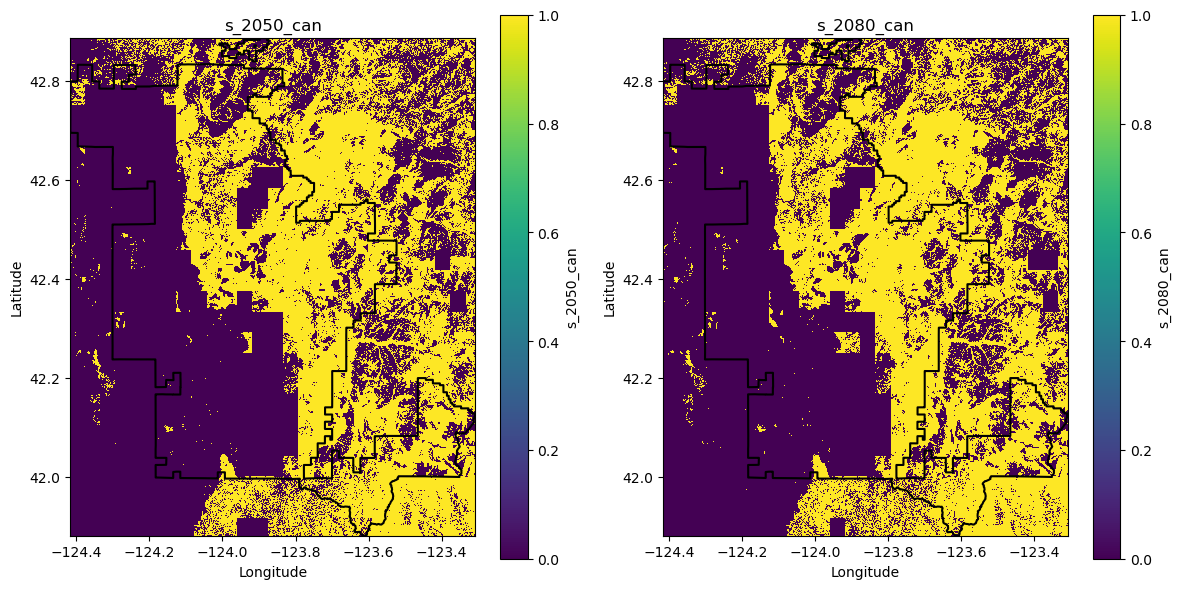

In [ ]:
# plot both Siskiyou CanESM2 habitat suitability DataArrays
plt = two_subplots(suit_das[0], suit_das[4], siskiyou_forest_gdf)

# Show the plot
plt.show()

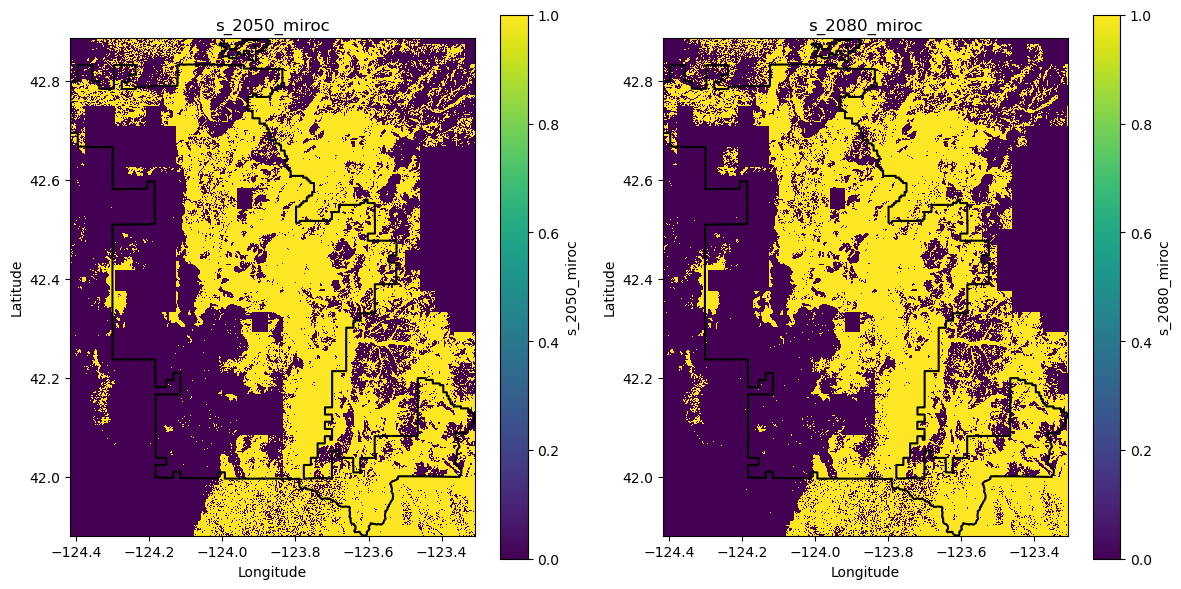

In [ ]:
# plot both Siskiyou MIROC-ESM-CHEM habitat suitability DataArrays
plt = two_subplots(suit_das[1], suit_das[5], siskiyou_forest_gdf)

# Show the plot
plt.show()

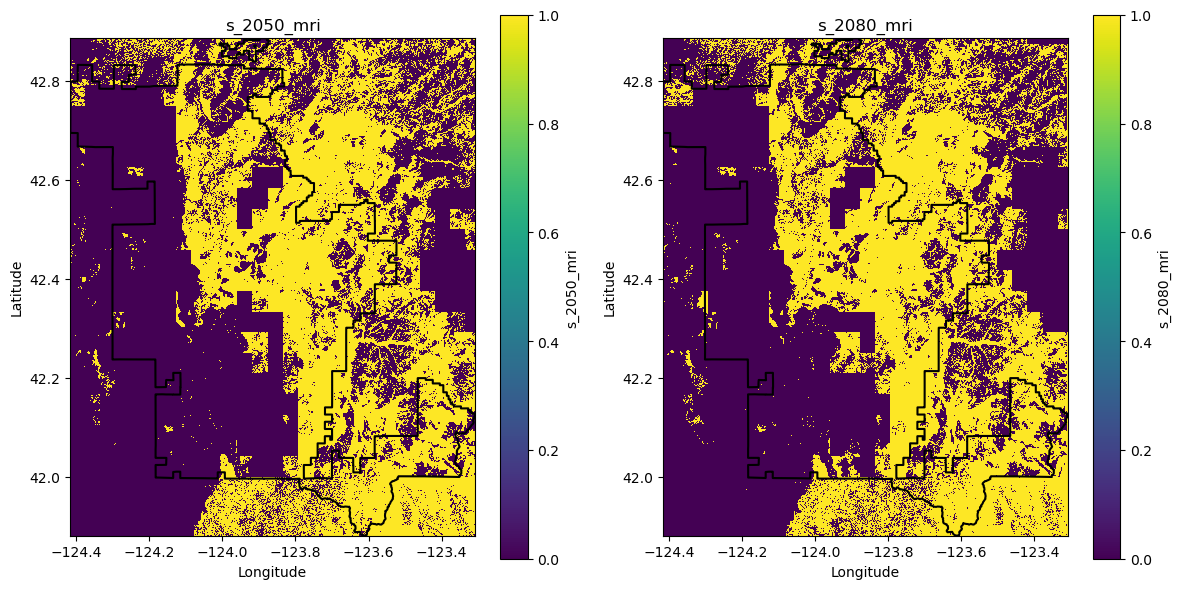

In [ ]:
# plot both Siskiyou MRI-CGCM3 habitat suitability DataArrays
plt = two_subplots(suit_das[2], suit_das[6], siskiyou_forest_gdf)

# Show the plot
plt.show()

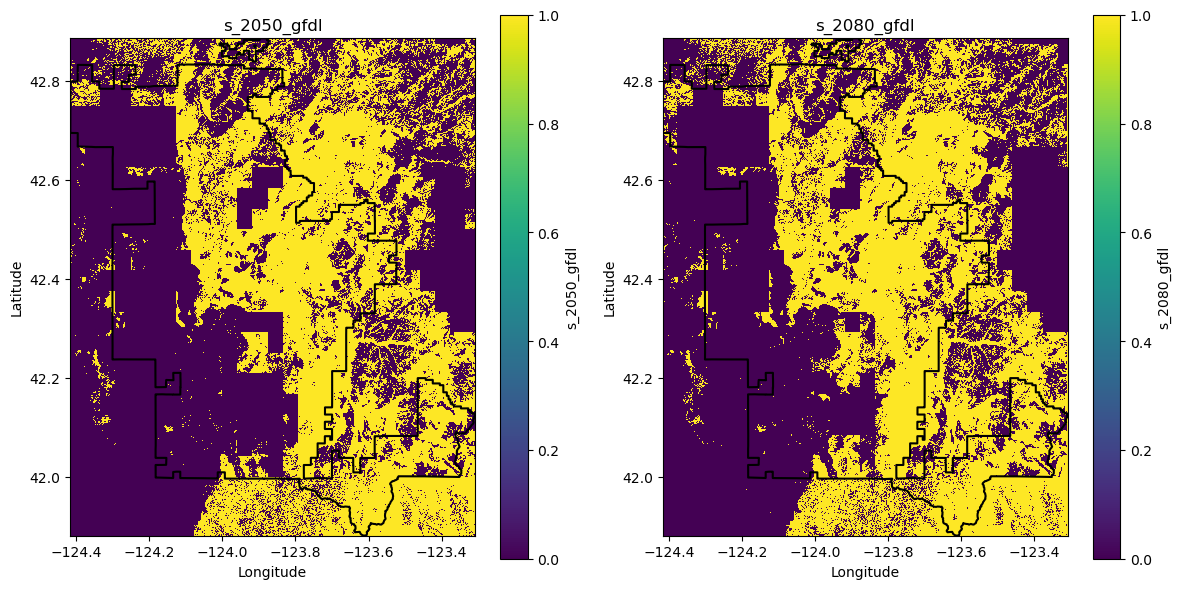

In [ ]:
# plot both Siskiyou GFDL-ESM2M habitat suitability DataArrays
plt = two_subplots(suit_das[3], suit_das[7], siskiyou_forest_gdf)

# Show the plot
plt.show()

<span style='color:purple'>

Siskyou National Forest Habitat Suitability DataArray plot interpretations:

* Under the CanESM2 climate model, there is very little difference in the habitat suitability plots between the 2050 time period and 2080 time period. The main visible difference I see is at about 42.3&deg;, -123.9&deg;. In the 2080 time period, that area of the Siskyou National Forest is slightly more habitable.

* Under the MIROC-ESM-CHEM model, the west side of Siskiyou National Forest seems generally slighlty more habitable in the 2080 time period than in the 2050 time period. There are some areas where there are more yellow areas (1 values/habitable areas) in the 2080 time period than there are in the 2050 time period. For example, at 42.7&deg;, -124.3&deg the 2080 time period has slightly more yellow than the 2050 time period. There is also more yellow showing at and near 42.2&deg;, -124&deg; in the 2080 time period than there is in the 2050 time period.

* Under the MRI-CGCM3 model, I see a similar story as the MIROC-ESM-CHEM model in that the 2080 time period has some slight areas of more habitability than the 2050 time period. For example, at about 42.2&deg;, -123.81&deg;, the 2080 time period is showing more yellow/habitable areas than the 2050 time pereiod.

* The GFDL-ESM2M model follows a similar pattern as the previous models - the 2080 time period appears to have more suitable areas than the 2050 model inside the Siskyou National Forest boundary. To me, this model visually shows the most difference between the time periods. I see notably more yellow areas from about 42.0&deg; to about 42.3&deg; along -123.8&deg; to -124.0&deg;. I also see that a large unsuitable area in the 2050 time period at about 42.6&deg;, -123.9&deg; shrinks to about half the size in the 2080 time period. 

Overall, a visual analysis of all the models and all the time periods for the Siskiyou National Forest shows that the 2080 time period is just barely more habitable under all climate models for the coastal redwood than the 2050 time period. 

Let's incorporate the habitat suitability percentages calculated at the end of the 04-fuzzy-logic-model notebook:

* CanESM2 Model:
    * Siskiyou 2050 CanESM2 suitability percentage is 42.59484150159488%
    * Siskiyou 2080 CanESM2 suitability percentage is 42.72003393096892%
    * Difference = 2080 time period - 2050 time period = 42.72003393096892% - 42.59484150159488% = ~0.125%

* MIROC-ESM-CHEM Model:
    * Siskiyou 2050 MIROC-ESM-CHEM suitability percentage is 44.82801890732369%
    * Siskiyou 2080 MIROC-ESM-CHEM suitability percentage is 44.94156279298718%
    * Difference = 2080 time period - 2050 time period = 44.94156279298718% - 44.82801890732369% = ~0.114%

* MRI-CGCM3 Model:
    * Siskiyou 2050 MRI-CGCM3 suitability percentage is 41.91787631336811%
    * Siskiyou 2080 MRI-CGCM3 suitability percentage is 42.023059271638644%
    * Difference = 2080 time period - 2050 time period = 42.023059271638644% - 41.91787631336811% = ~0.105%

* GFDL-ESM2M Model:
    * Siskiyou 2050 GFDL-ESM2M suitability percentage is 42.69776811687691%
    * Siskiyou 2080 GFDL-ESM2M suitability percentage is 43.72059746301224%
    * Difference = 2080 time period - 2050 time period =  = ~1.023%

Analyzing the differences in percentages above, a couple of conclusions can be drawn and wonderings/next steps can be established:

* Similar to my visual analysis of the plots, the 2080 time period is *very* slightly more habitable under all climate models for the coastal redwood than the 2050 time  period. For the CanESM2, MIROC-ESM-CHEM, and MRI-CGCM3 models, the Siskiyou National Forest in the 2080 time period has at most about 0.13% more habitable area than the 2050 time period. The GFDL-ESM2M model shows the biggest difference with the 2080 time period being about 1% more habitable than the 2050 time period.

* Since the differences are so slight, I wonder whether not enough time passes between the 2050 and 2080 time period for the climate models to make a significant difference.

* Currently, the coastal redwood has a very narrow habitat in the United States in California and Oregon. So although the difference in percentages and difference in plots seems very small, I wonder how impactful those differences would actually be since the redwood habitat is not large to begin with.

* We know that the [amount of fog in the coastal redwoods' habitat is very important to its survival](https://www.srs.fs.usda.gov/pubs/misc/ag_654/volume_1/sequoia/sempervirens.htm). I wonder if that is why the GFDL-ESM2M model shows the biggest difference between the time periods because it is the model representing a cold and dry climate. If the climate is cold and dry, I imagine fog would not be very common and I wonder if that is part of the reason why the GFDL-ESM2M model shows the biggest difference.

* For next steps, I would like to explore ways to explicitly analyze/model how much fog is available in different time periods in different climate models since that is very important to the redwoods' habitat suitability.

</span>

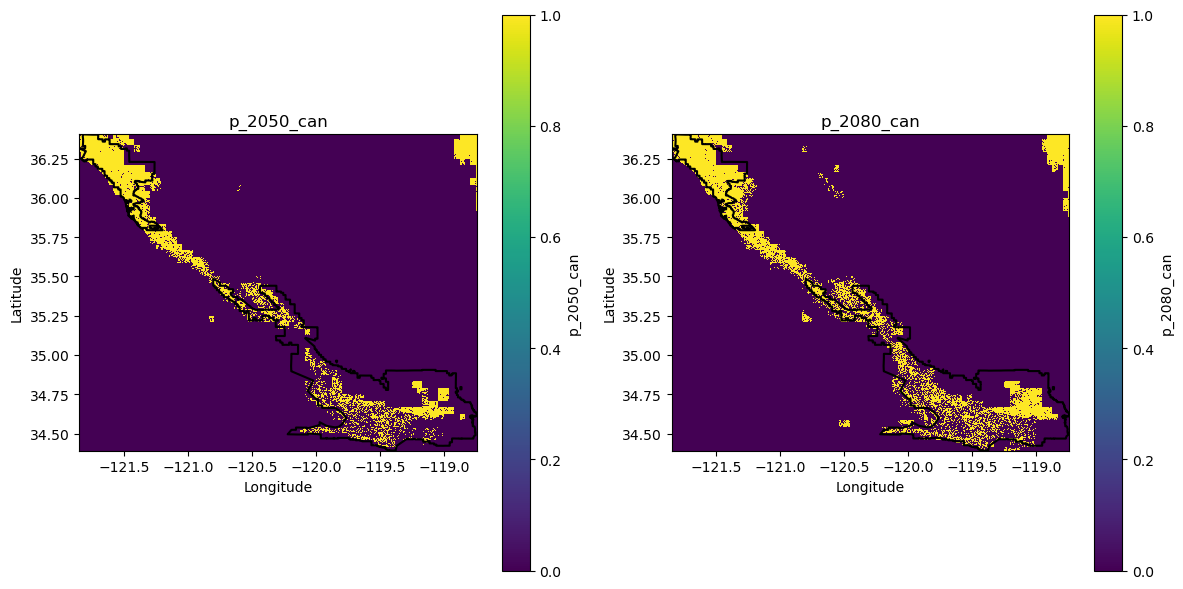

In [ ]:
# plot both Los Padres CanESM2 habitat suitability DataArrays
# this took my computer 12 minutes to plot
plt = two_subplots(suit_das[8], suit_das[12], padres_forest_gdf)

# Show the plot
plt.show()

<span style='color:purple'>

Los Padres National Forest Habitat Suitability DataArray plot interpretation:

* Under the CanESM2 model, looking inside the Los Padres National Forest boundary, I see more differences in habitat suitability in the southeastern part of the forest than the northwestern part. In the area inside 34.75&deg; to 35.25&deg; and from -120.0&deg; to -120.5&deg;, the 2080 time period has notably more habitat sutiability than the 2050 time period. I also see more suitable areas in the 2080 time period from 34.50&deg; to 34.75&deg; and from -118.5&deg; to -119.5&deg;. 

Let's incorporate the habitat suitability percentages calculated at the end of the 04-fuzzy-logic-model notebook:

* CanESM2 Model:
    * Los Padres 2050 CanESM2 suitability percentage is 6.686083674205136%
    * Los Padres 2080 CanESM2 suitability percentage is 8.823332847642842%
    * Difference = 2080 time period - 2050 time period = 8.823332847642842% - 6.686083674205136% = ~2.137%
    * This difference supports what is seen visually in the plots: the 2080 time period has more habitat suitability than the 2050 time period.
    

</span>

MemoryError: Unable to allocate 2.42 GiB for an array with shape (7246, 11184, 4) and data type float64

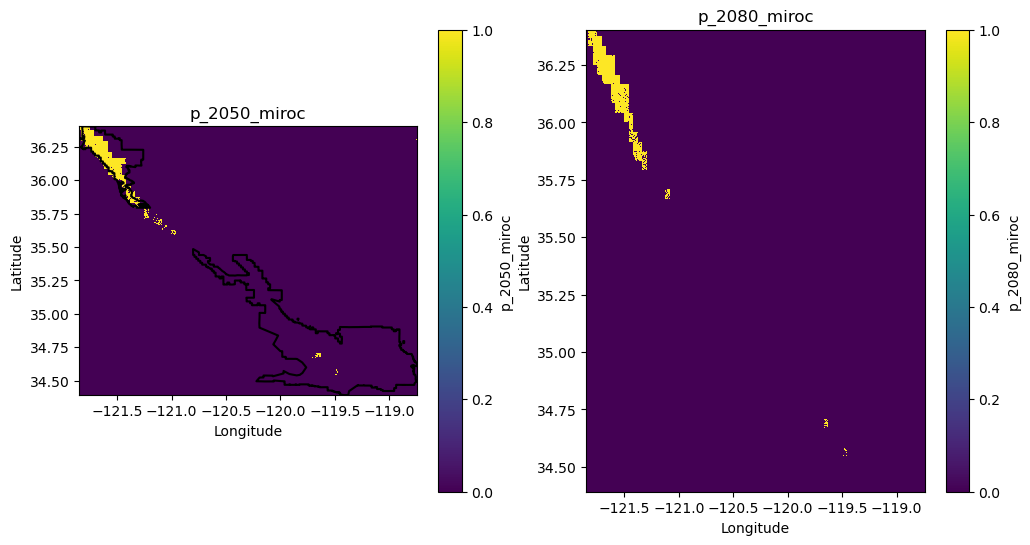

In [ ]:
# plot both Los Padres MIROC-ESM-CHEM habitat suitability DataArrays
plt = two_subplots(suit_das[9], suit_das[13], padres_forest_gdf)

# Show the plot
plt.show()

In [ ]:
# plot both Los Padres MRI-CGCM3 habitat suitability DataArrays
plt = two_subplots(suit_das[10], suit_das[14], padres_forest_gdf)

# Show the plot
plt.show()

In [ ]:
# plot both Los Padres GFDL-ESM2M habitat suitability DataArrays
plt = two_subplots(suit_das[11], suit_das[15], padres_forest_gdf)

# Show the plot
plt.show()